# Stats 202C - Homework 2

## Monte Carlo Statistical Methods (Robert, Casella) (Ch. 7)

## Peter Racioppo (103953689)

In [43]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math
from scipy.linalg import eig
from scipy.stats import gamma

### Question (7.1)
### Calculate the mean of a Gamma(4.3,6.2) random variable using

### (a) Accept-Reject with a Gamma(4,7) candidate.

In [110]:
def f_Accept_Reject(alpha,beta,a,b,num_samp):
    x_g = np.random.gamma(a,b,num_samp)
    f = gamma.pdf(x_g, alpha, scale=beta) # Target
    g = gamma.pdf(x_g, a, scale=b) # Proposal
    unif = np.random.uniform(low=0.0,high=g,size=num_samp)
    X = []
    for i in np.arange(num_samp):
        if unif[i] < f[i]:
            X.append(x_g[i])  

    mean = np.mean(X)
    eff = len(X)/num_samp

    return X, mean, eff

The mean is 26.824086581747025
The efficiency is 0.959


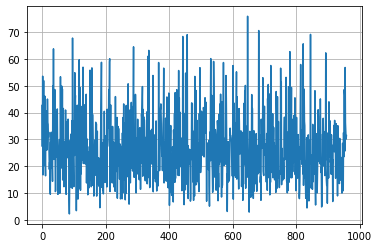

In [111]:
alpha = 4.3
beta = 6.2
a = 4
b = 7
num_samp = 1000

X, mean, eff = f_Accept_Reject(alpha,beta,a,b,num_samp)
print("The mean is",mean)
print("The efficiency is", eff)
plt.plot(X)
plt.grid()

### (b) Metroplis-Hastings with a Gamma(4,7) candidate.

In [32]:
# Note that if X ~ Gamma(alpha,beta),
# cX ~ Gamma(alpha,beta/c)

# Yt = np.random.gamma(4,7,num_samp)
# rho_t = np.minimum(((Yt/xt) * np.exp((xt - Yt)/alpha))**(alpha - np.floor(alpha)),1)
# Xt1 = np.random.choice([Yt,xt],num_samp,p=[rho_t,1 - rho_t])

In [112]:
def f_Gamma_Metropolis_Hastings(alpha,beta,a,b,num_samp):
    X = np.zeros(num_samp)
    X[0] = np.random.gamma(alpha,beta) # Set first value
    x_g = np.random.gamma(a,b,num_samp)

    for i in (np.arange(num_samp-1)+1):
        num = gamma.pdf(X[i-1], a, scale=b)*gamma.pdf(x_g[i], alpha, scale=beta)
        denom = gamma.pdf(x_g[i], a, scale=b)*gamma.pdf(X[i-1], alpha, scale=beta)
        rho = num/denom
        X[i] = X[i-1]
        if np.random.uniform(0,1) < rho:
            X[i] += (x_g[i] - X[i-1])
    
    mean = np.mean(X)
    eff = len(np.unique(X))/num_samp

    return X, mean, eff

The mean is 26.654561447875373
The efficiency is 0.957


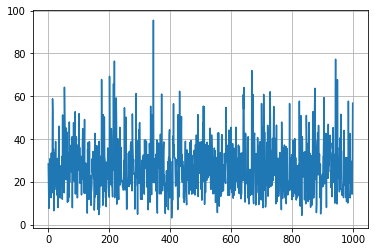

In [113]:
alpha = 4.3
beta = 6.2
a = 4
b = 7
num_samp = 1000

X, mean, eff = f_Gamma_Metropolis_Hastings(alpha,beta,a,b,num_samp)
print("The mean is",mean)
print("The efficiency is", eff)

plt.plot(X)
plt.grid()

### (c) Metroplis-Hastings with a Gamma(5,6) candidate.

The mean is 26.59776340032537
The efficiency is 0.842


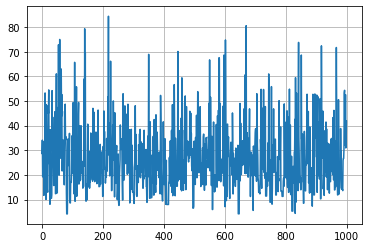

In [114]:
alpha = 4.3
beta = 6.2
a = 5
b = 6
num_samp = 1000

X, mean, eff = f_Gamma_Metropolis_Hastings(alpha,beta,a,b,num_samp)
print("The mean is",mean)
print("The efficiency is", eff)

plt.plot(X)
plt.grid()

### (Note: the exact answer is 26.66.)